In [13]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt

In [14]:
# Load data
X = pd.read_csv('./correlation_files/c1_stats.csv').values
wear_data = pd.read_csv('./data/raw/c1/c1_wear.csv')

y = wear_data[['flute_1', 'flute_2', 'flute_3']].values


In [15]:
tscv = TimeSeriesSplit(n_splits=5)

In [16]:
tscv.split(X)

<generator object TimeSeriesSplit._split at 0x0000026655C9CD60>

In [17]:
# error lists
train_errors = []
val_errors = []


for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    # Normalize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # LASSO model
    lasso = MultiOutputRegressor(Lasso(alpha=0.1, max_iter=10000))
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    
    mse_val = np.mean((y_test - y_pred) ** 2, axis=0)  # MSE for each flute
    mse_train = np.mean((y_train - lasso.predict(X_train_scaled)) ** 2, axis=0)  # MSE for training set
    
    train_errors.append(mse_train)
    val_errors.append(mse_val)


In [18]:
split_data = list(tscv.split(X))

In [19]:
# Use the best model (#3)
# Get the 3rd batch of data from split_data
scaler = StandardScaler()
X_3_train, X_3_test = X[split_data[2][0]], X[split_data[2][1]]
y_3_train, y_3_test = y[split_data[2][0]], y[split_data[2][1]]

X_3_train_scaled = scaler.fit_transform(X_3_train) 

In [20]:
X_scaled = scaler.transform(X)

lasso = MultiOutputRegressor(Lasso(alpha=0.1, max_iter=10000))
lasso.fit(X_3_train_scaled, y_3_train)
y_pred = lasso.predict(X_scaled)

In [21]:
#mse_val = np.mean((y_test - y_pred) ** 2, axis=0)  # MSE for each flute
#mse_train = np.mean((y_train - lasso.predict(X_train_scaled)) ** 2, axis=0)  # MSE for training set
#### plot this for all

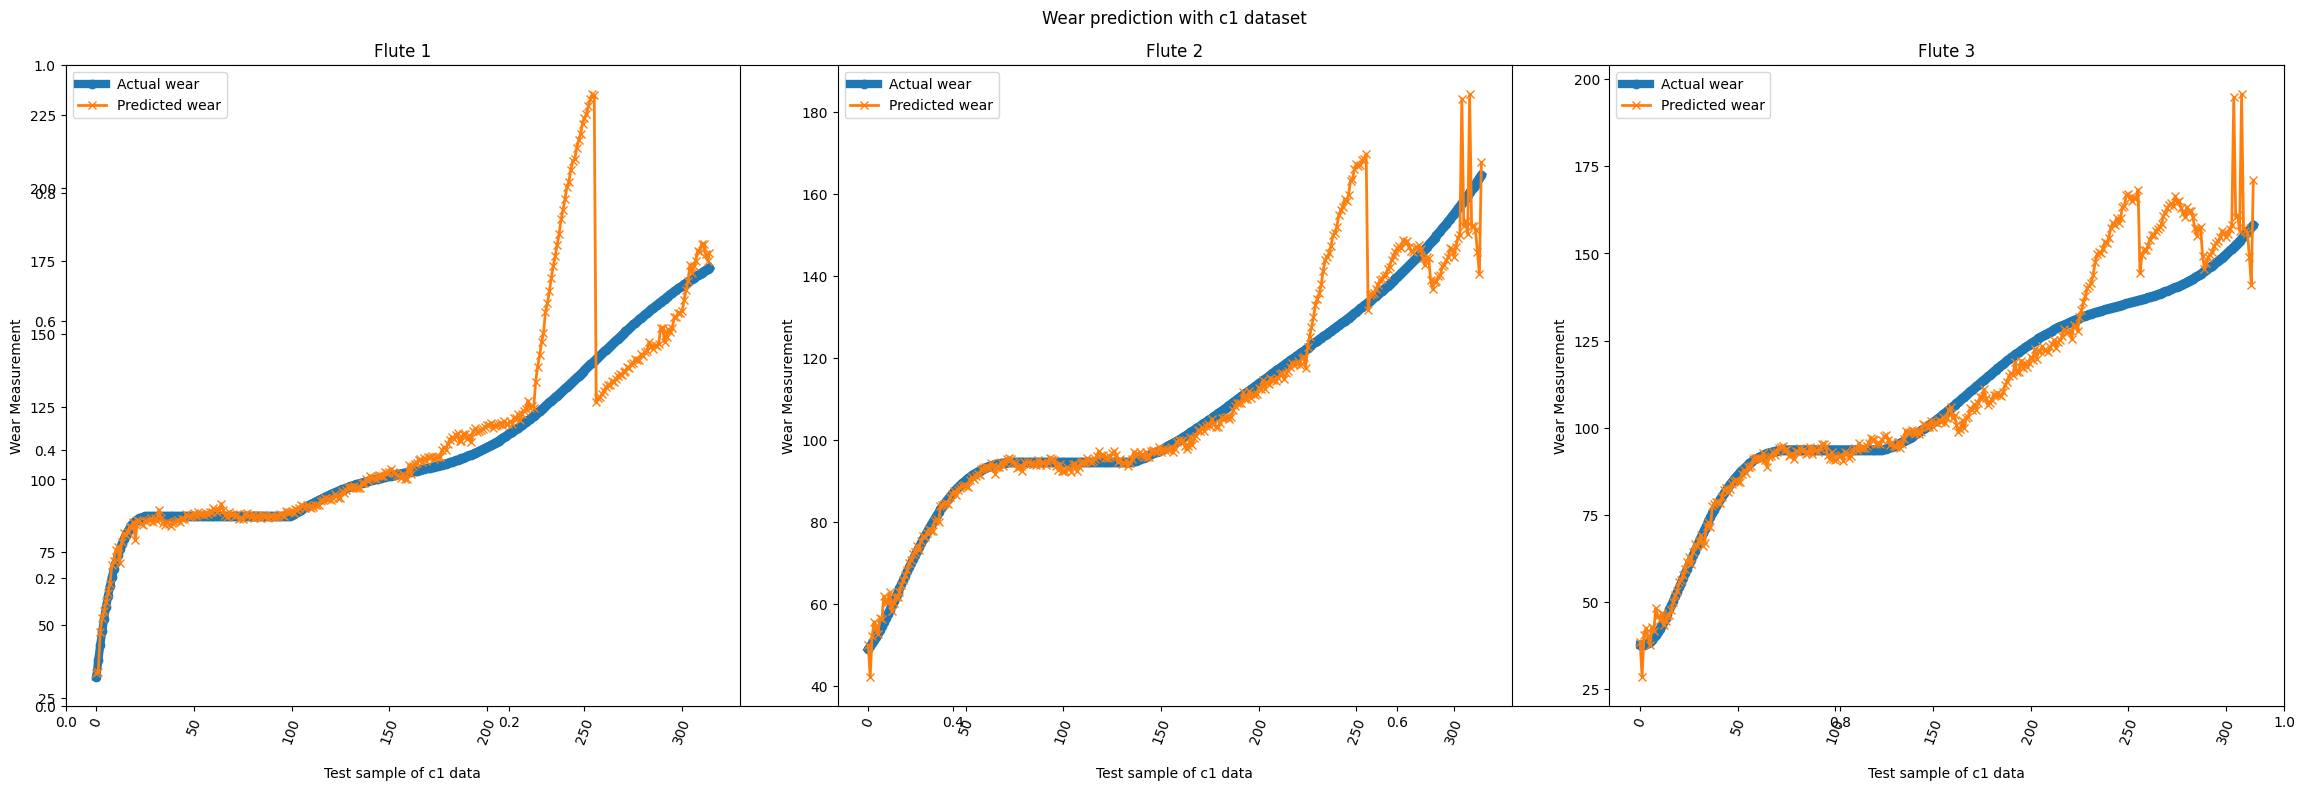

In [22]:
plt.figure(figsize=(24, 9))

plt.title('Wear prediction with c1 dataset', pad=30)
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.plot(range(315), y[:, i], label='Actual wear', marker='o', linewidth=6.0)
    plt.plot(range(315), y_pred[:, i], label='Predicted wear', marker='x', linewidth=2.0)
    plt.title(f'Flute {i + 1}')
    plt.xlabel('Test sample of c1 data', labelpad=15)
    plt.ylabel('Wear Measurement')
    plt.legend()
    plt.xticks(rotation=70)
    
plt.tight_layout(pad=3.0)
plt.show()

In [23]:
# Load data
X_c4 = pd.read_csv('../notebooks/correlation_files/c4_stats.csv').values
wear_data_c4 = pd.read_csv('../notebooks/data/raw/c4/c4_wear.csv')

y_c4 = wear_data_c4[['flute_1', 'flute_2', 'flute_3']].values


In [24]:
X_c4_scaled = scaler.transform(X_c4)
y_c4_pred = lasso.predict(X_c4_scaled)

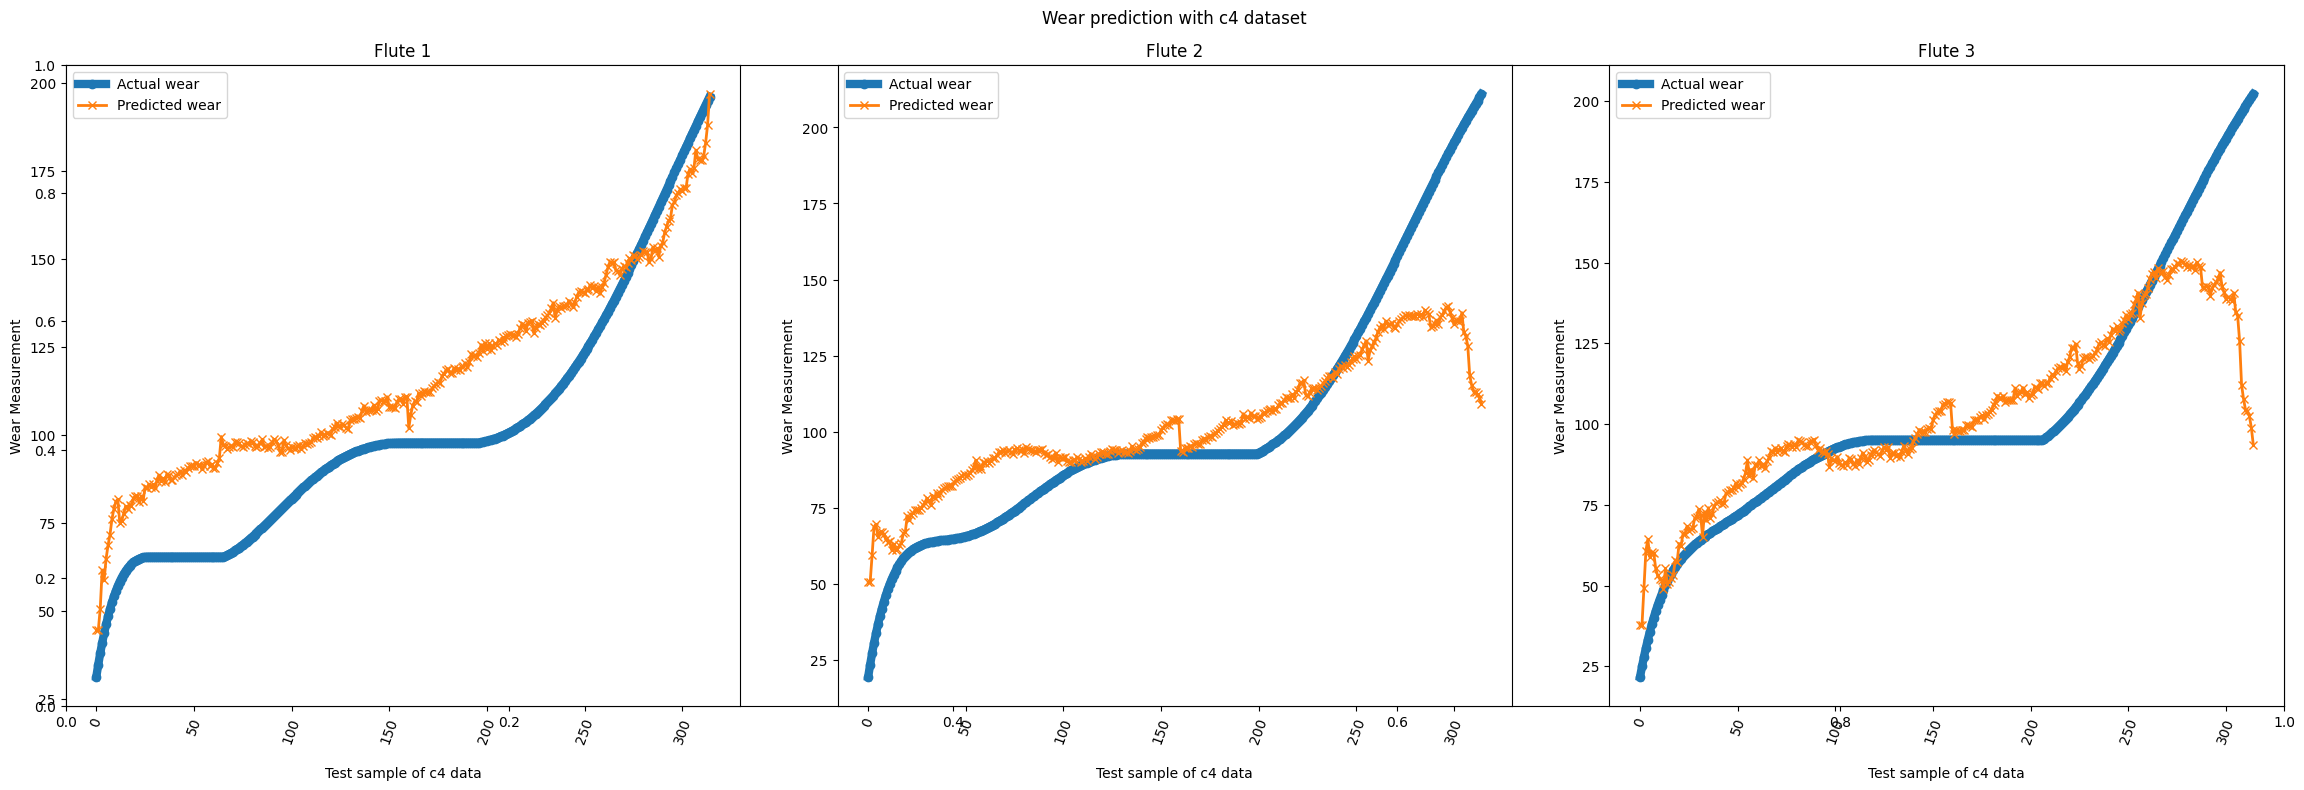

In [25]:
plt.figure(figsize=(24, 9))

plt.title('Wear prediction with c4 dataset', pad=30)
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.plot(range(315), y_c4[:, i], label='Actual wear', marker='o', linewidth=6.0)
    plt.plot(range(315), y_c4_pred[:, i], label='Predicted wear', marker='x', linewidth=2.0)
    plt.title(f'Flute {i + 1}')
    plt.xlabel('Test sample of c4 data', labelpad=15)
    plt.ylabel('Wear Measurement')
    plt.legend()
    plt.xticks(rotation=70)
    
plt.tight_layout(pad=3.0)
plt.show()